In [56]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [57]:
# Read the data from the CSV file
df = pd.read_csv('segmentation_data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [58]:
# Locate any missing values (NAN)
df.isna().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [59]:
# Find the descirptive statistics of the numerical columns
df["Income"].describe()
df["Age"].describe()

count    2000.000000
mean       35.909000
std        11.719402
min        18.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        76.000000
Name: Age, dtype: float64

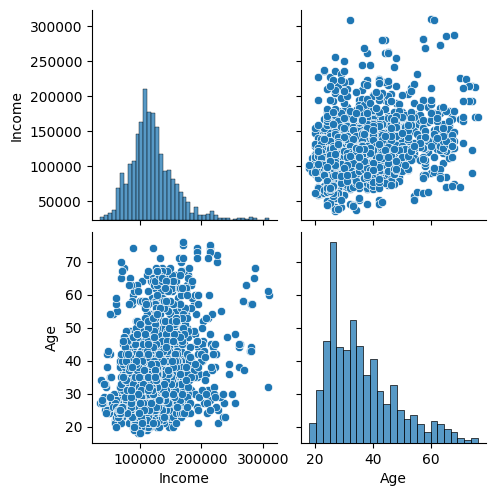

In [60]:
# Plot the distribution of the numerical columns
df_numerical = df[['Income', 'Age']]
sns.pairplot(df_numerical)

<Axes: >

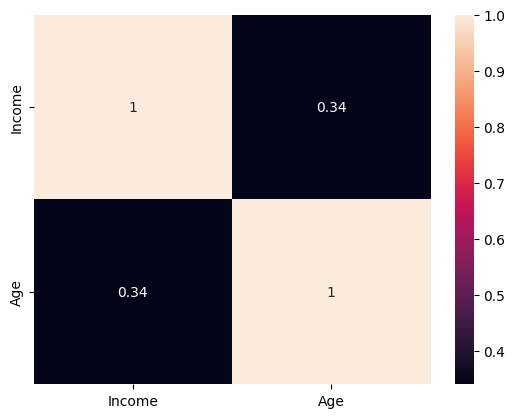

In [61]:
# Plot the correlation matrix of the numerical columns
correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot=True)

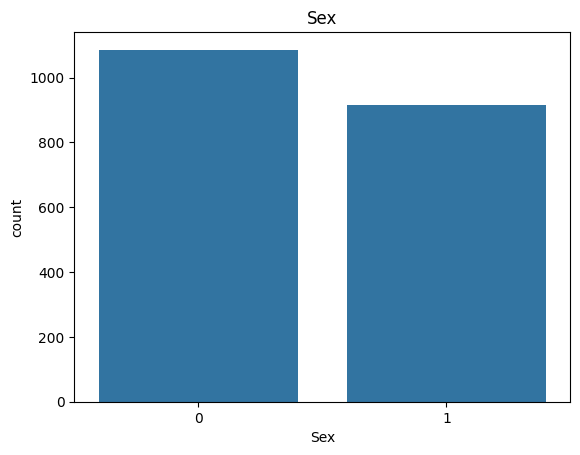

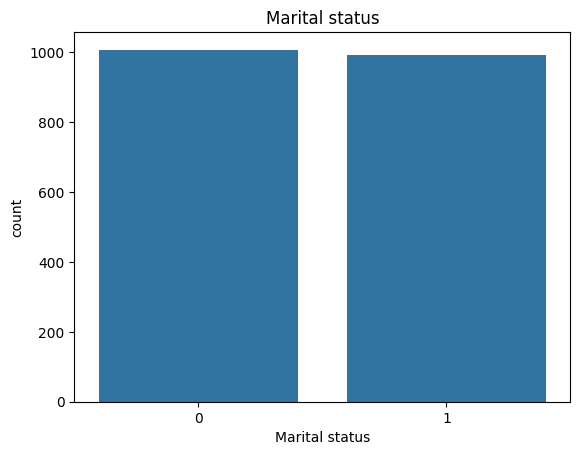

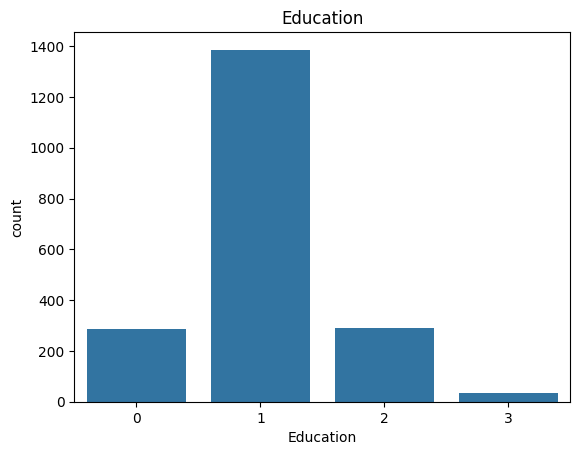

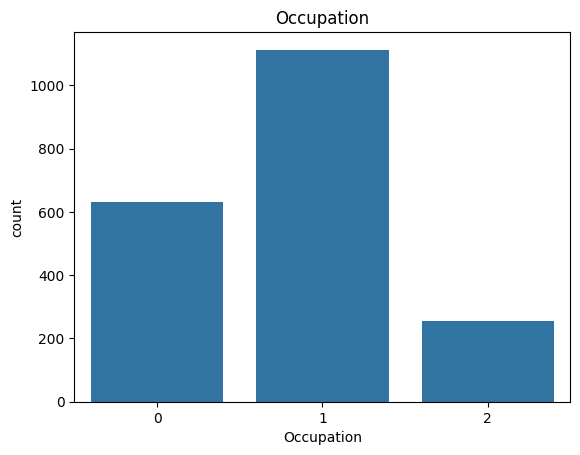

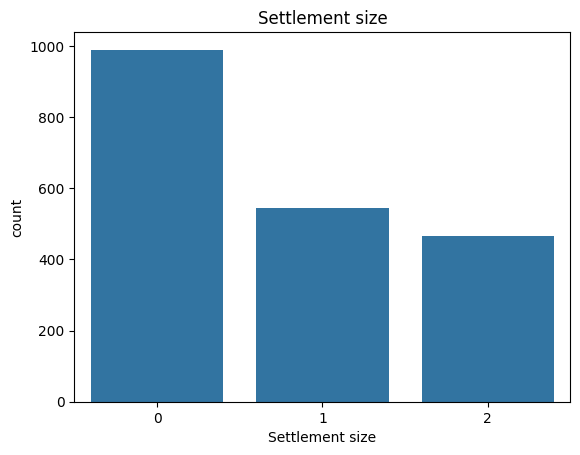

In [62]:
# For the categorical columns, plot the frequency of each category
df_categorical = df.drop(['Income', 'Age', "ID"], axis=1)
for column in df_categorical.columns:
    sns.countplot(df_categorical, x=column).set_title(column)
    plt.show()

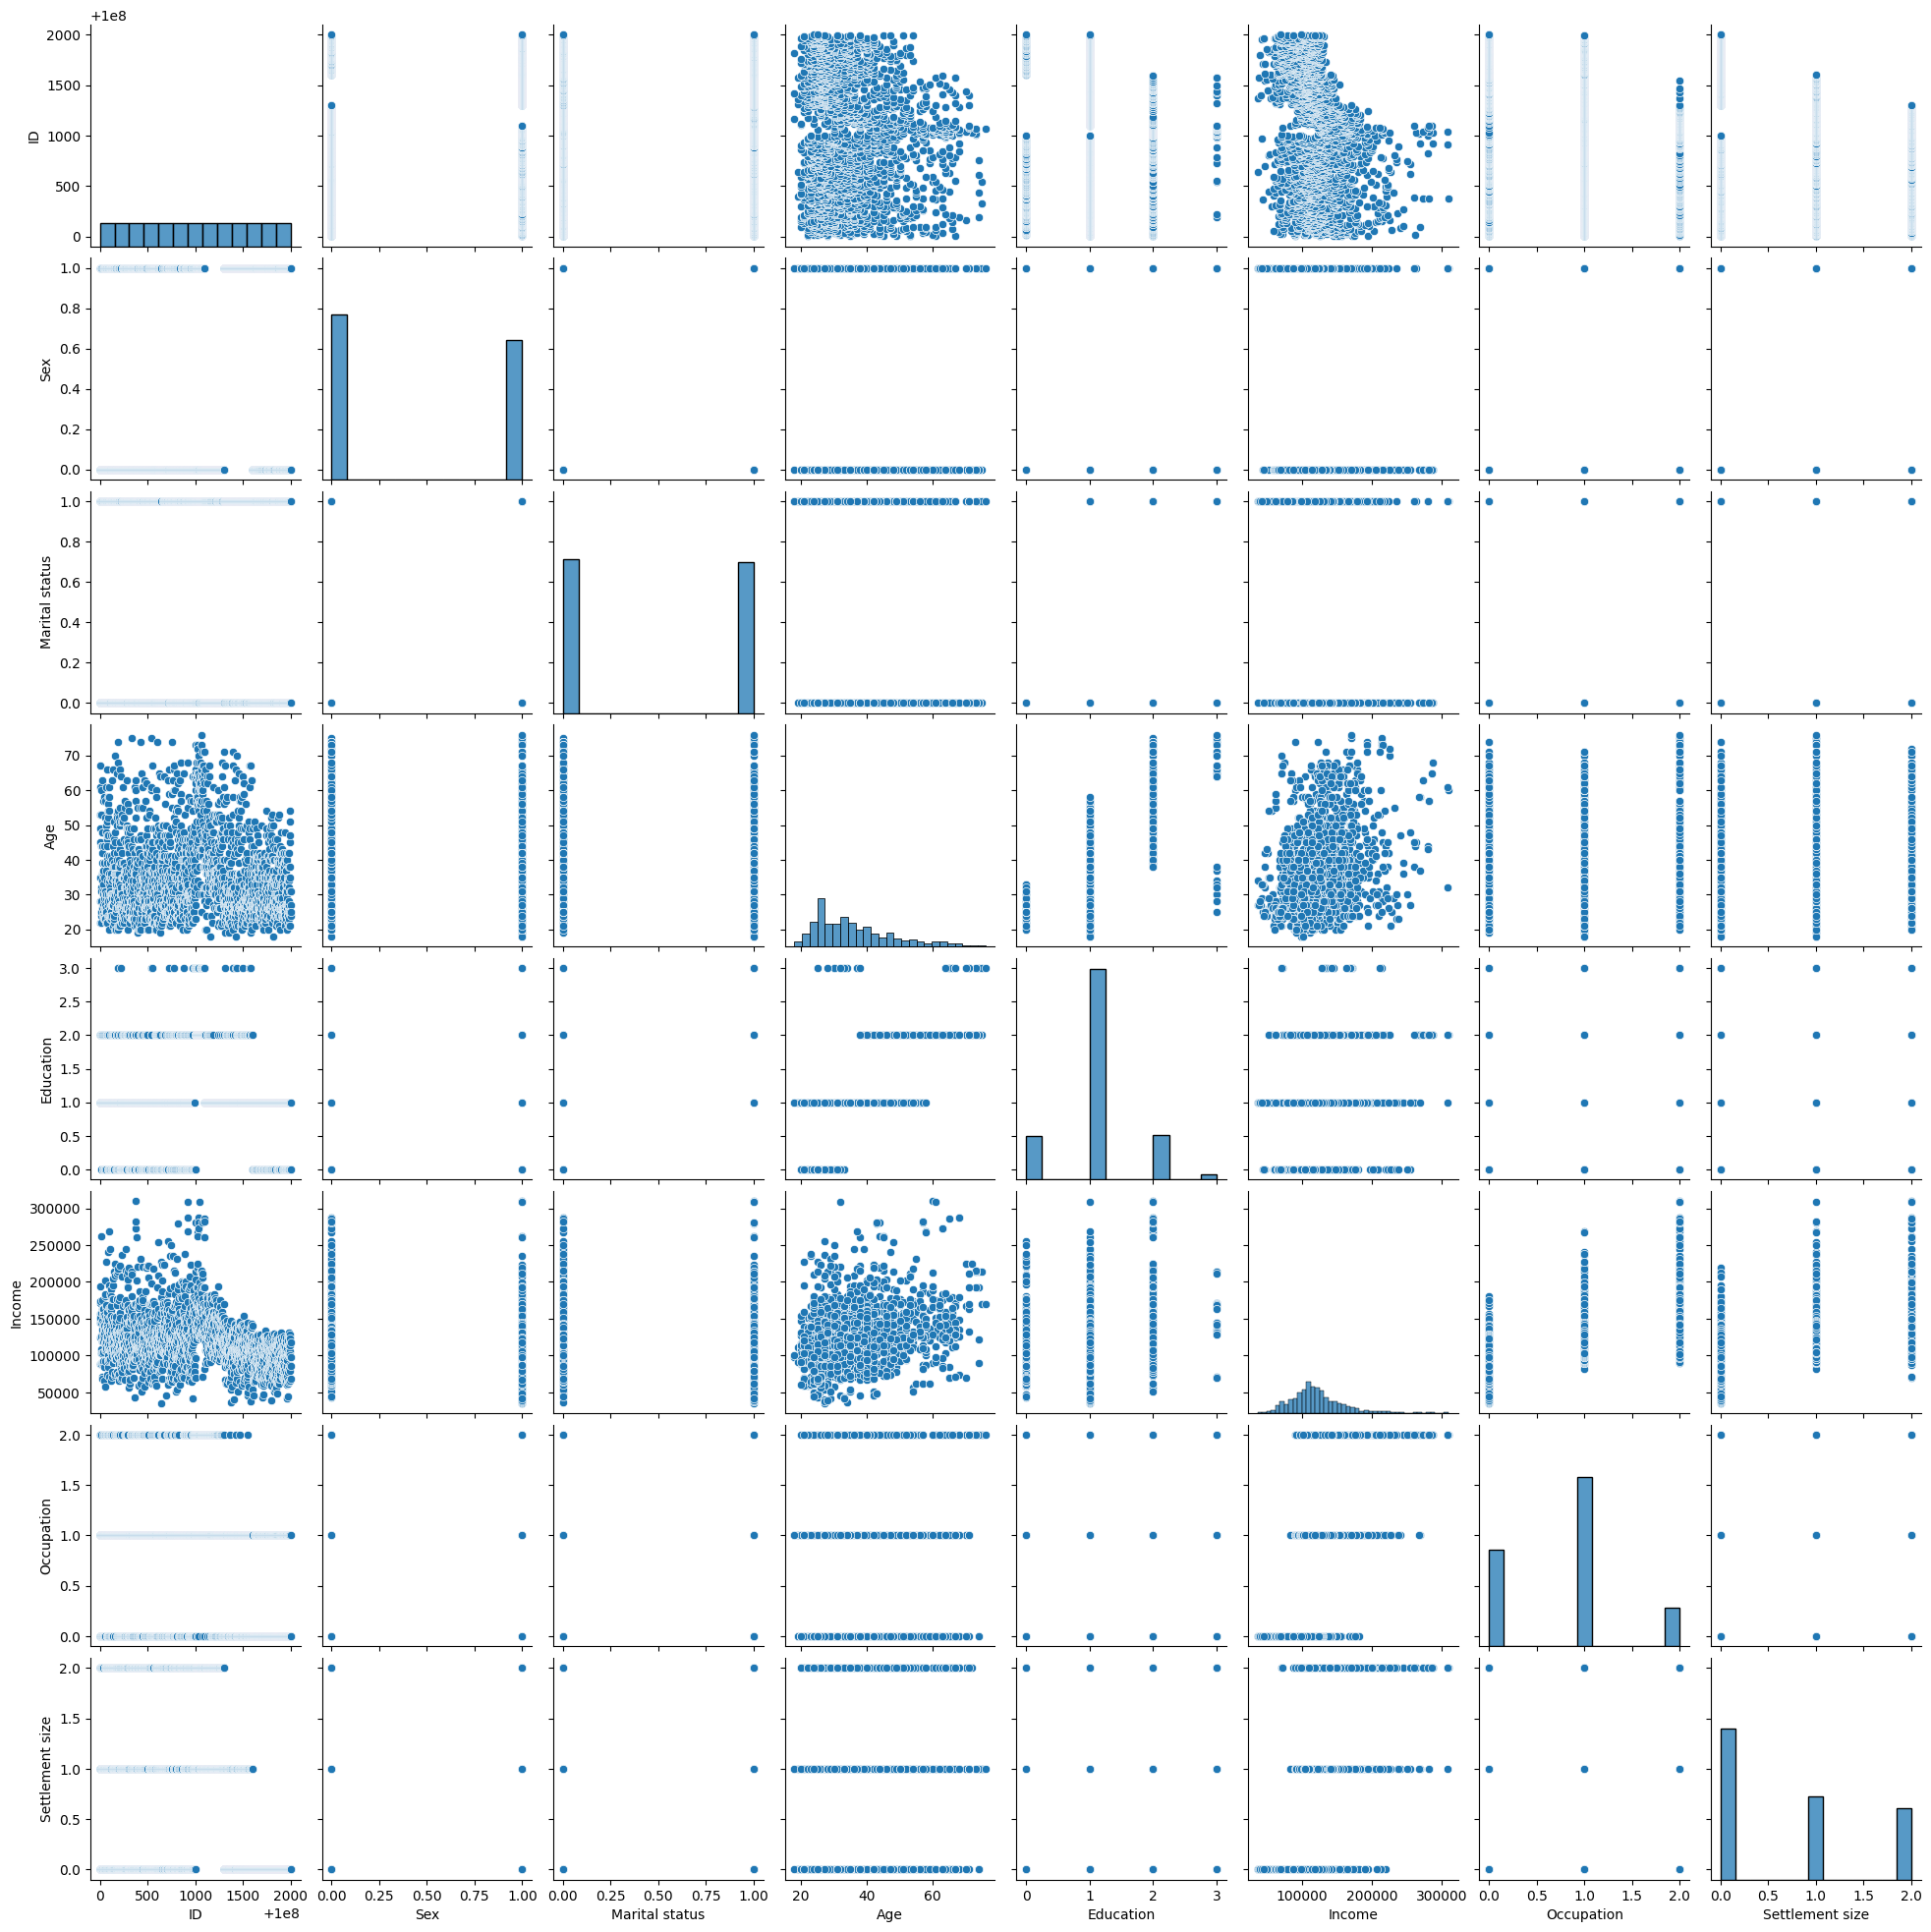

In [63]:
# Visualizing the whole dataset using a pairplot
sns.pairplot(df)

In [64]:
# Although very hard to see, there are certain clusters in the data with different forms according to the pairplot.
X = df.drop(['ID'], axis=1)
X_normalized = normalize(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

Text(0.5, 1.0, 'Elbow Method')

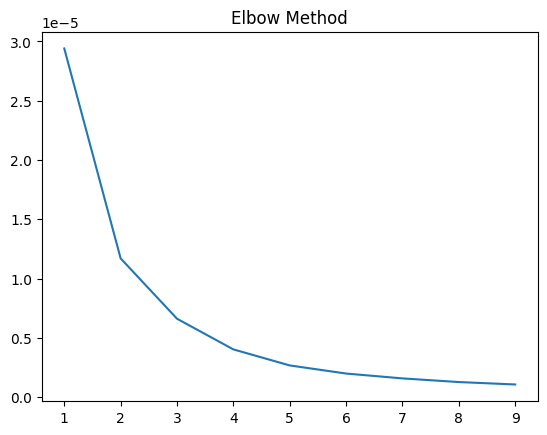

In [65]:
# To find the best value for k, we will use the elbow method
k_values = range(1, 10)
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    inertia_values.append(kmeans.inertia_)

sns.lineplot(x=k_values, y=inertia_values).set_title("Elbow Method")

In [66]:
# According to the elbow method, the best value for k is 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_normalized)

KMeans(n_clusters=3, random_state=42)

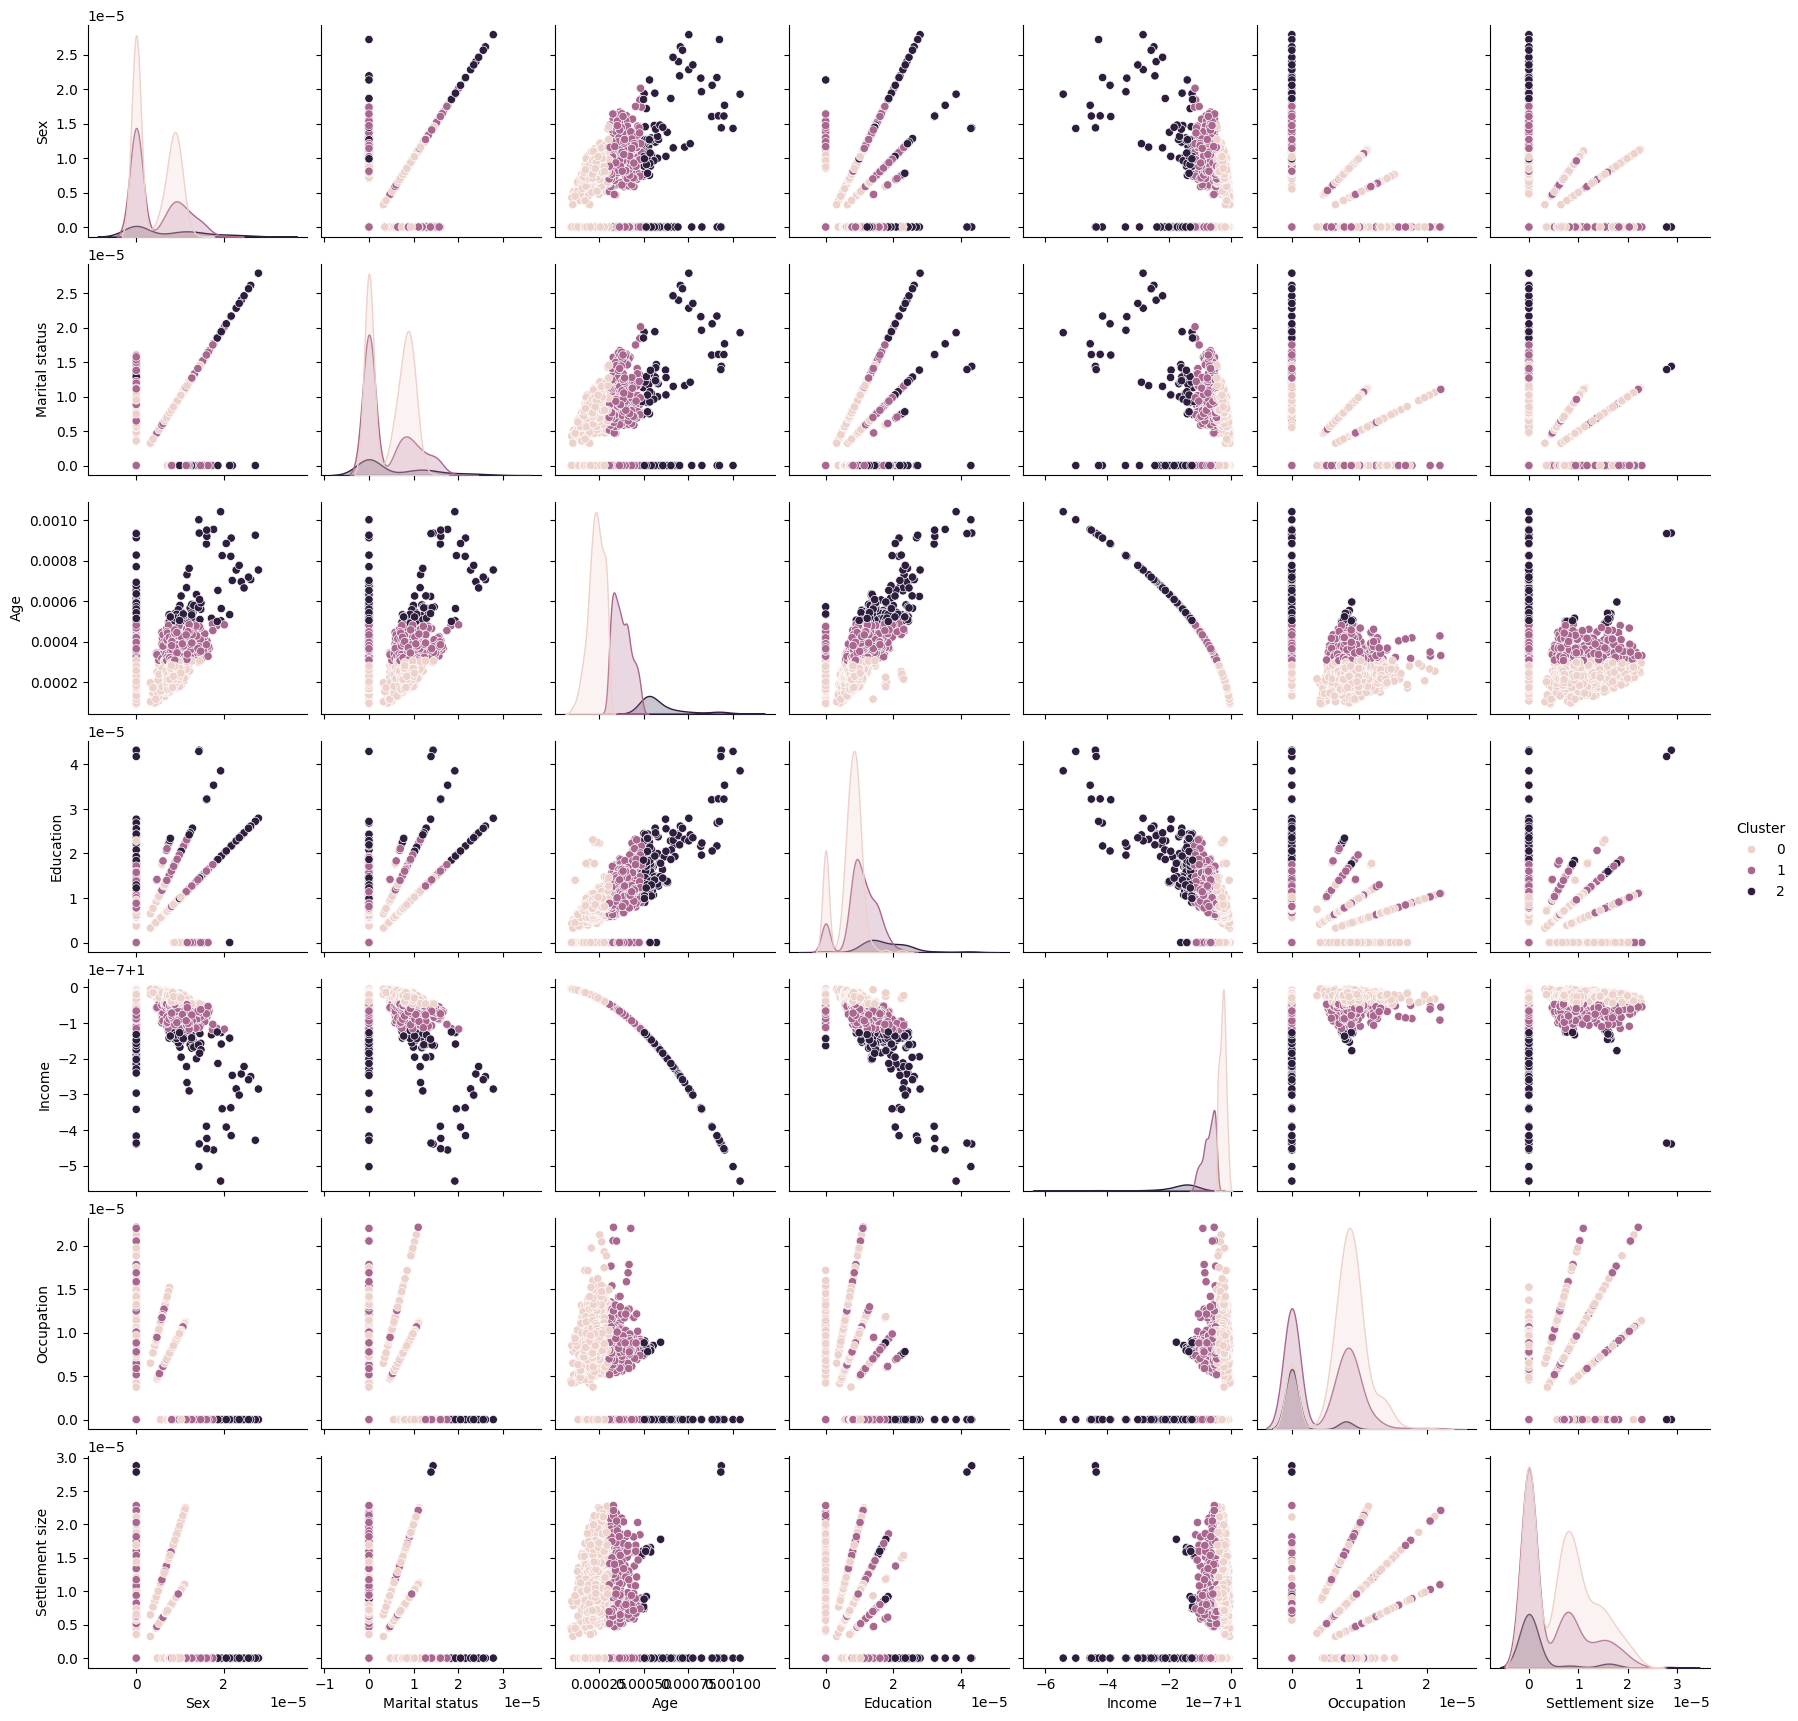

In [67]:
# Evaluate the model by plotting the clusters
X_normalized["Cluster"] = kmeans.labels_
sns.pairplot(X_normalized, hue="Cluster")

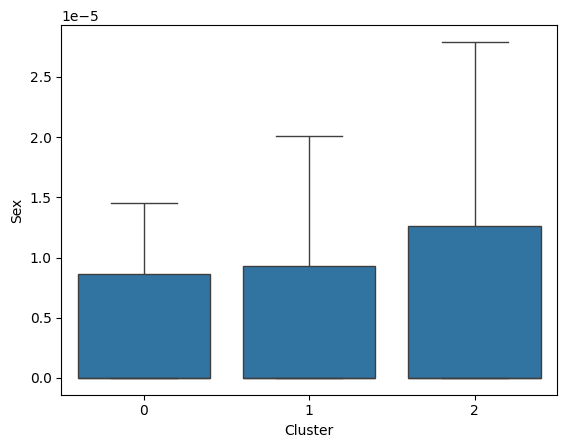

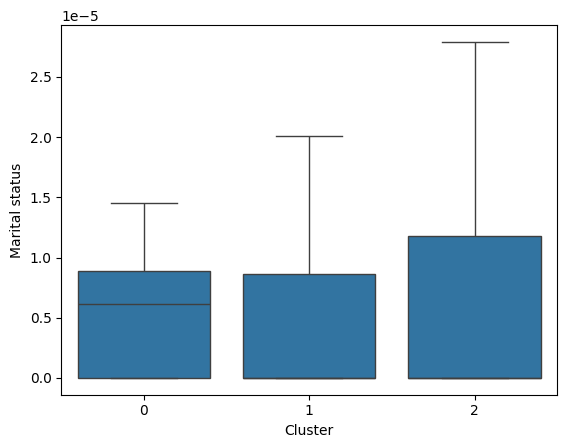

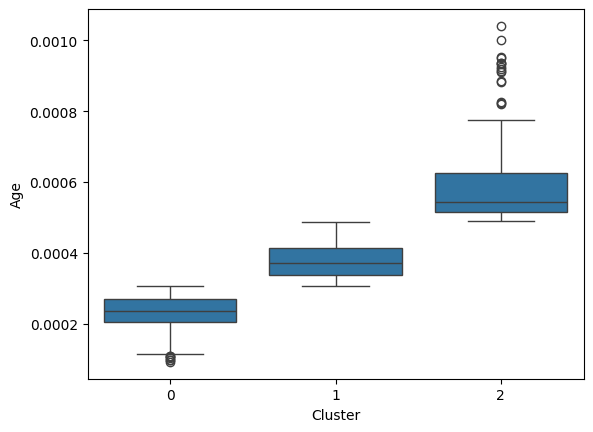

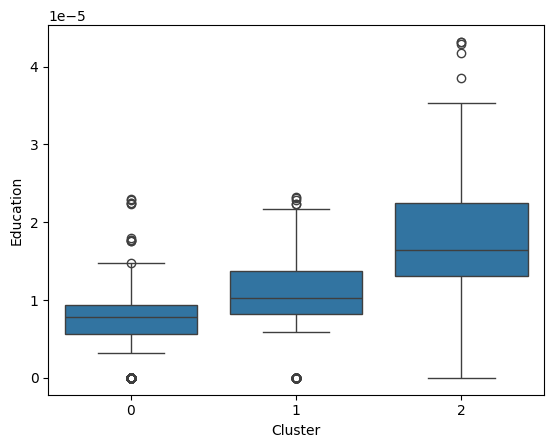

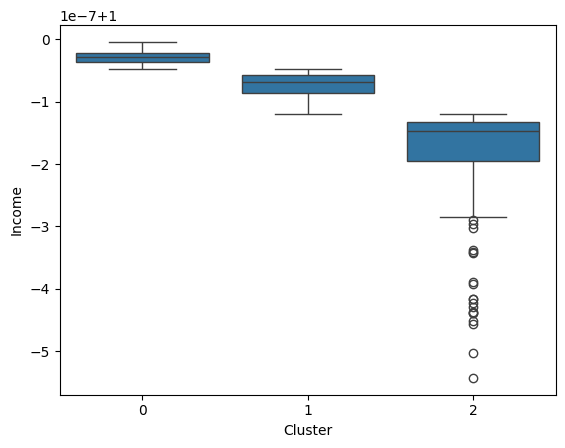

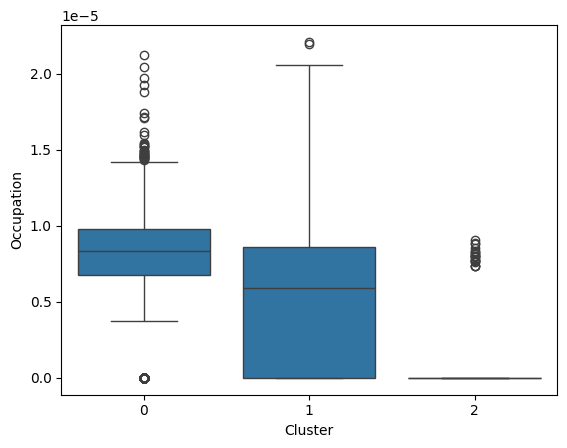

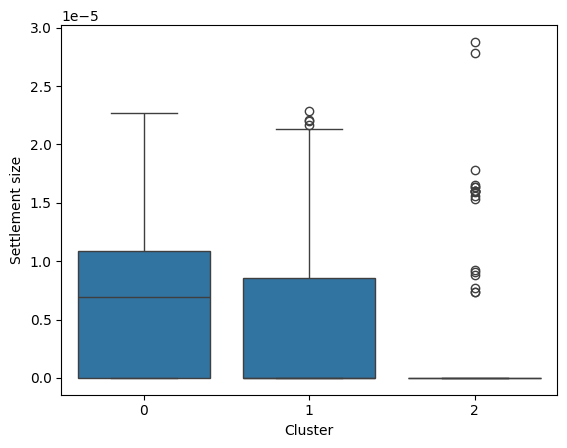

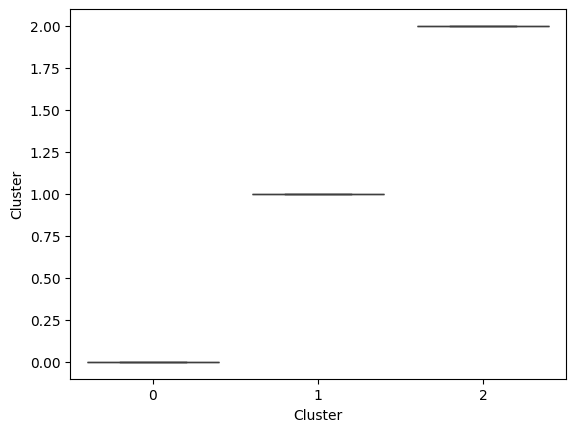

In [68]:
# Using Box Plots to visualize the clusters is also a good option
for column in X_normalized.columns:
    sns.boxplot(x="Cluster", y=column, data=X_normalized)
    plt.show()

In [69]:
# Evalutaing the model using Silhouette Score
# Silhouette Score is a metric used to calculate the goodness of a clustering technique, it ranges from -1 to 1
# -1 means that the clusters are not well separated, 1 means that the clusters are well separated, and 0 means that the clusters are overlapping
from sklearn.metrics import silhouette_score
silhouette_score(X_normalized, kmeans.labels_)

0.9999387358641979

In [72]:
# Evaluating the model using the Davies-Bouldin Index
# The Davies-Bouldin Index is a metric used to calculate the goodness of a clustering technique, it ranges from 0 to infinity
# 0 means that the clusters are well separated, and infinity means that the clusters are overlapping
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X_normalized, kmeans.labels_)

0.00012026954768087373

## KMeans Clustering Notes
- As a clustering algorithm, it is an unsupervised learning algorithm that categorizes the data points to a number of categories indicated by a value of k. KMeans specifically uses the "Mean" (usually referred to a centroid) of each cluster as the center of each cluster.
- The best value of k could be found by using the elbow method. The best value of k could be seen visually by looking at the "elbow point" which is the point that has the most change in inertia (before the rate suddenly dips down to a slower rate). The elbow point represents a good balance between minimizing inertia and avoiding overfitting.
- The inertia refers to the tightness of the clusters which could be calculated by the sum of squared euclidian distance between the data points from each clusters. High inertia indicates that the data points are more spread out and lower inertia means indicates that the data points are more lumped together.

## Conclusion about this dataset.
- The data was already pre-processed with no NAN values, already encoded categorical values. Although normalizing the dataset was a necessary since the dataset's numerical values are very high and normalizing the values is a good preprocessing step as it helps the model categorizes the cluster easily.
- According to KMeans clustering (Actually, it was mostly from the elbow method that indicates the best k value is 3), there are three types of customers.
- ARI, RI and Mutual Info Score (Adjusted Random Index, Random Index and Mutual Infomation) scores was not used because there are no true labels to this dataset as the purpose of this dataset was a generic clustering categorizations of each customer types based on the features given by the dataset.
- Overall the model performed exceptionally well according to the sillhouette scores and davies_boulin score as it almost has a perfect score.